# *+Processing with Sentinel bands & RN & biomass data of other authors+*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
input_data = '/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/Pre_GIS_data/Site_with_Sentinel_bands_data.csv'
df = pd.read_csv(input_data)
df.head()

,Site #,Origin,Dominant_s,N_trees at,A_year,D_live_cm,H_live_m,G_live_m2_,f_Gs_cub_m,f_M_stem_kg_m2,...,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
0,1,n,Birch,57,35,13.5,17.3,15.1,123,5.83,...,0.030628,0.266210,0.166299,0.081316,0.793351,-0.733693,0.532051,-15.396488,-11.262037,0.731937
1,2,a,Pine,25,58,15.0,16.9,39.0,317,11.67,...,0.027934,0.183349,0.102656,0.052144,0.735493,-0.655456,0.557000,-16.012156,-9.364664,0.584920
2,3,a,Pine,32,58,13.7,16.8,42.8,346,12.37,...,0.026123,0.184066,0.099625,0.050684,0.751436,-0.650575,0.568148,-13.609903,-9.726108,0.715177
3,4,a,Pine,63,58,20.3,18.4,38.8,315,13.88,...,0.027390,0.177221,0.102540,0.052198,0.732404,-0.648310,0.544717,-14.321650,-10.457536,0.730390
4,5,a,Pine,53,58,17.5,19.9,48.3,383,14.51,...,0.025702,0.183705,0.101394,0.050437,0.754481,-0.660382,0.569112,-13.934375,-11.393335,0.817430


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Site #', 'Origin', 'Dominant_s', 'N_trees at', 'A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_', 'f_Gs_cub_m', 'f_M_stem_kg_m2', 'f_M_stem_bark_kg_m2', 'f_M_crown_kg_m2', 'f_M_foliage_kg_m2', 'f_M_AG_kg_m2', 'Ln_Gs_cub_m', 'Ln_M_stem_kg_m2', 'Ln_M_stem_bark_kg_m2', 'Ln_M_crown_kg_m2', 'Ln_M_foliage_kg_m2', 'Ln_M_AG_kg_m2', 'F_Soil', 'M_Soil', 'X_N36', 'Y_N36', 'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Tag_Cs', 'Tag_Sr', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'Cs_2021_kB', 'Sr_2021_kB', 'AEDR_count', 'AEDR_mean', 'Distance_k', 'Azimuth', 'r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12', 'r2020B13', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Ln_Gs_cub_m', 'Ln_M_stem_kg_m2', 'Ln_M_stem_bark_kg_m2', 'Ln_M_crown_kg_m2', 'Ln_M_foliage_kg_m2', 'Ln_M_AG_kg_m2', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'])
            


# Show the first five columns
select.head()

,Ln_Gs_cub_m,Ln_M_stem_kg_m2,Ln_M_stem_bark_kg_m2,Ln_M_crown_kg_m2,Ln_M_foliage_kg_m2,Ln_M_AG_kg_m2,Ln_Cs_wood,Ln_Sr_wood,Ln_Tag_Cs,Ln_Tag_Sr,...,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
0,4.81,1.76,-0.31,-0.16,-2.44,1.91,6.8,9.2,-0.7,2.6,...,0.030628,0.266210,0.166299,0.081316,0.793351,-0.733693,0.532051,-15.396488,-11.262037,0.731937
1,5.76,2.46,-0.25,0.34,-0.20,2.63,8.2,9.6,0.6,2.9,...,0.027934,0.183349,0.102656,0.052144,0.735493,-0.655456,0.557000,-16.012156,-9.364664,0.584920
2,5.85,2.52,-0.11,0.55,-0.21,2.70,8.4,9.6,0.8,2.9,...,0.026123,0.184066,0.099625,0.050684,0.751436,-0.650575,0.568148,-13.609903,-9.726108,0.715177
3,5.75,2.63,-0.08,0.39,-0.35,2.78,8.1,9.4,0.5,2.7,...,0.027390,0.177221,0.102540,0.052198,0.732404,-0.648310,0.544717,-14.321650,-10.457536,0.730390
4,5.95,2.67,0.00,0.57,-0.37,2.83,7.7,9.4,0.2,2.8,...,0.025702,0.183705,0.101394,0.050437,0.754481,-0.660382,0.569112,-13.934375,-11.393335,0.817430


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ln_Gs_cub_m           205 non-null    float64
 1   Ln_M_stem_kg_m2       205 non-null    float64
 2   Ln_M_stem_bark_kg_m2  205 non-null    float64
 3   Ln_M_crown_kg_m2      205 non-null    float64
 4   Ln_M_foliage_kg_m2    205 non-null    float64
 5   Ln_M_AG_kg_m2         205 non-null    float64
 6   Ln_Cs_wood            205 non-null    float64
 7   Ln_Sr_wood            205 non-null    float64
 8   Ln_Tag_Cs             205 non-null    float64
 9   Ln_Tag_Sr             205 non-null    float64
 10  r2019B01              205 non-null    float64
 11  r2019B02              205 non-null    float64
 12  r2019B03              205 non-null    float64
 13  r2019B04              205 non-null    float64
 14  r2019B05              205 non-null    float64
 15  r2019B06              2

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_s"])["f_Gs_cub_m", "f_M_stem_kg_m2"].describe()

/tmp/ipykernel_20534/4147815954.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Dominant_s"])["f_Gs_cub_m", "f_M_stem_kg_m2"].describe()


f_Gs_cub_m                                                      \
                count        mean         std    min    25%    50%    75%   
Dominant_s                                                                  
Alder            13.0  393.153846  113.795757  199.0  311.0  434.0  462.0   
Aspen             7.0  241.571429  134.878782  121.0  147.0  194.0  321.0   
Birch            45.0  164.622222   83.668254   11.0  107.0  157.0  222.0   
Oak               9.0  199.777778   88.192655   79.0  112.0  220.0  255.0   
Pine            130.0  299.023077  185.204955    2.0  144.0  316.0  451.0   
Spruce            1.0  619.000000         NaN  619.0  619.0  619.0  619.0   

                  f_M_stem_kg_m2                                             \
              max          count       mean       std    min     25%    50%   
Dominant_s                                                                    
Alder       558.0           13.0  16.823846  4.334304   9.90  13.560  16.96   
Aspen       440.0            7.0  11.862857  7.997334   4.64   6.470   9.79   
Birch       346.0           45.0   8.030444  4.090891   0.84   4.960   7.75   
Oak         313.0            9.0  10.728889  4.976167   3.59   5.870  11.72   
Pine        671.0          130.0  11.784154  7.069419   0.05   5.915  11.96   
Spruce      619.0            1.0  23.830000       NaN  23.83  23.830  23.83   

                           
               75%    max  
Dominant_s                 
Alder       20.130  24.29  
Aspen       14.810  26.05  
Birch       10.990  17.00  
Oak         13.590  18.99  
Pine        17.305  25.37  
Spruce      23.830  23.83

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Ln_Gs_cub_m,Ln_M_stem_kg_m2,Ln_M_stem_bark_kg_m2,Ln_M_crown_kg_m2,Ln_M_foliage_kg_m2,Ln_M_AG_kg_m2,Ln_Cs_wood,Ln_Sr_wood,Ln_Tag_Cs,Ln_Tag_Sr,...,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,5.224390,2.071854,-0.042439,0.168537,-0.941463,2.297463,5.995610,7.382927,-0.620000,2.310732,...,0.028895,0.219361,0.131344,0.068068,0.759654,-0.692408,0.526662,-15.737088,-10.490763,0.668847
std,1.125422,1.119577,0.780389,0.583474,0.714443,0.926225,2.084309,2.041062,1.275808,0.951460,...,0.010704,0.049137,0.036023,0.026479,0.091469,0.070703,0.144729,1.547144,1.471517,0.081010
min,0.690000,-3.000000,-3.910000,-1.560000,-2.920000,-0.800000,1.600000,2.400000,-4.700000,-0.300000,...,0.015301,0.140309,0.078918,0.035914,0.363395,-0.849155,-0.037478,-22.820204,-16.820473,0.386847
25%,4.930000,1.770000,-0.190000,-0.030000,-1.510000,2.050000,4.100000,5.800000,-1.400000,1.700000,...,0.022685,0.183403,0.102471,0.051182,0.727961,-0.735660,0.470852,-16.494671,-11.364958,0.615553
50%,5.510000,2.410000,0.060000,0.310000,-0.680000,2.570000,6.300000,7.500000,-0.500000,2.400000,...,0.026123,0.199665,0.121704,0.060839,0.771691,-0.693779,0.562326,-15.454248,-10.299303,0.666882
75%,5.980000,2.800000,0.370000,0.530000,-0.360000,2.930000,7.300000,8.700000,0.300000,3.000000,...,0.030628,0.250913,0.153232,0.078586,0.814177,-0.660039,0.626609,-14.760403,-9.547850,0.728737
max,6.510000,3.260000,1.650000,1.410000,0.110000,3.390000,11.400000,13.900000,1.700000,4.700000,...,0.081675,0.423326,0.252487,0.196544,0.914709,-0.389420,0.740912,-12.365163,-5.703308,0.877743


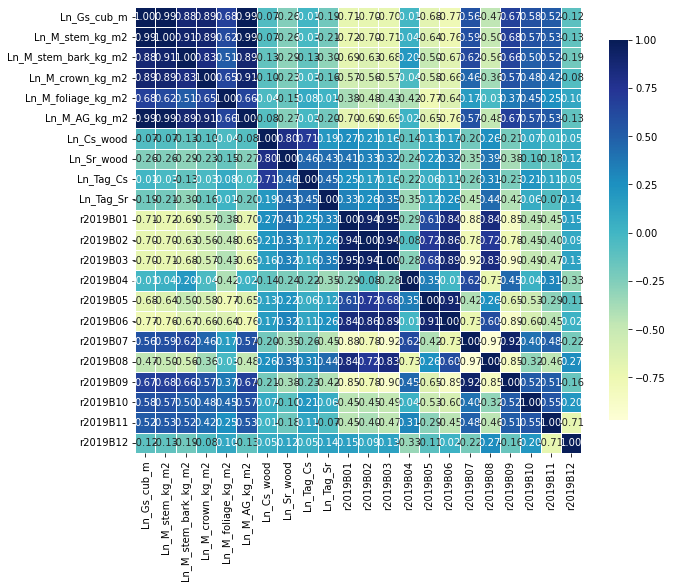

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['r2019B01', 'r2019B04', 'r2019B06', 'r2019B10', 'r2019B11'])
y = pd.DataFrame(select, columns= ['Ln_M_stem_kg_m2'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): Yes


Selected "Yes"!!! A new column with random values was created.


In [10]:
# Columns in "X" data collections
X.head()

,r2019B01,r2019B02,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12,Random1,Random2,Random3,Random4,Random5
0,0.025483,0.040910,0.030628,0.266210,0.166299,0.081316,0.793351,-0.733693,0.532051,-15.396488,-11.262037,0.731937,12.800105,9.432313,10.547534,9.933776,6.943458
1,0.024075,0.038164,0.027934,0.183349,0.102656,0.052144,0.735493,-0.655456,0.557000,-16.012156,-9.364664,0.584920,9.635930,10.621824,8.600901,10.719762,8.555244
2,0.022492,0.038968,0.026123,0.184066,0.099625,0.050684,0.751436,-0.650575,0.568148,-13.609903,-9.726108,0.715177,10.284084,9.029843,10.834651,13.270303,11.239446
3,0.023742,0.037811,0.027390,0.177221,0.102540,0.052198,0.732404,-0.648310,0.544717,-14.321650,-10.457536,0.730390,10.062038,6.031443,11.339801,8.844694,12.779612
4,0.022916,0.037557,0.025702,0.183705,0.101394,0.050437,0.754481,-0.660382,0.569112,-13.934375,-11.393335,0.817430,6.603175,9.866881,9.805843,10.413706,8.950151


In [11]:
# Columns in "y" data collections
y.head()

,Ln_M_stem_kg_m2
0,1.76
1,2.46
2,2.52
3,2.63
4,2.67


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.4572188315625967, 0.46186709447867447, 0.44081814345510395]
    Mean: 0.453
    Std: 0.009

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.01616427 0.84709182 0.85122125]
    Mean: 0.905
    Std: 0.079

 --------------------
Mean absolute error (MAE): 

    Scores: [0.43824427370575886, 0.6241879946133806, 0.5023667016888366]
    Mean: 0.522
    Std: 0.077

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=30, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Model with rank: 1
Mean validation score: 0.393 (std: 0.276)
Parameters: {'colsample_bytree': 0.5999363329842052, 'gamma': 0.47195063820071537, 'learning_rate': 0.06434771650634094, 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.7518867859578695}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.24310756, 0.1189187 , 0.10236568, 0.29618077, 0.2977828 ,
       0.24827719, 0.0936976 , 0.27198548, 0.19243979, 0.32255454,
       0.31218977, 0.10635266, 0.12202015, 0.17144618, 0.25907106,
       0.09230733, 0.12356806, 0.32558947, 0.26208315, 0.27523637,
       0.31417761, 0.15983071, 0.20610228, 0.21857686, 0.13756747,
       0.31609278, 0.21981382, 0.09380169, 0.13644953, 0.17331319]), 'std_fit_time': array([0.02097747, 0.01121299, 0.01342812, 0.01392091, 0.04137055,
       0.01503799, 0.00269364, 0.00219705, 0.00344569, 0.0033594 ,
       0.007821  , 0.00043646, 0.00464222, 0.0129265 , 0.02071069,
       0.00029533, 0.00295457, 0.06881436, 0.04978461, 0.00672035,
       0.03055152, 0.00671761, 0.00965199, 0.01520832, 0.00842462,
       0.00678697, 0.0035577 , 0.00468042, 0.00075863, 0.00536651]), 'mean_score_time': array([0.00473857, 0.0046082 , 0.00479536, 0.00476794, 0.00466499,
       0.00461354, 0.00455885, 0.00458136, 0.00445547, 0.00467863,
     

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.5999363329842052
Gamma: 0.47195063820071537
Learning_rate: 0.06434771650634094
Max_depth: 4
N_estimators: 50
Subsample: 0.7518867859578695


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(30):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:1.84023	validation_1-rmse:1.73006
[1]	validation_0-rmse:1.73560	validation_1-rmse:1.63157
[2]	validation_0-rmse:1.63838	validation_1-rmse:1.54888
[3]	validation_0-rmse:1.54489	validation_1-rmse:1.46374
[4]	validation_0-rmse:1.45718	validation_1-rmse:1.38603
[5]	validation_0-rmse:1.37446	validation_1-rmse:1.31713
[6]	validation_0-rmse:1.30039	validation_1-rmse:1.25738
[7]	validation_0-rmse:1.22982	validation_1-rmse:1.20210
[8]	validation_0-rmse:1.16431	validation_1-rmse:1.14811


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.10312	validation_1-rmse:1.09420
[10]	validation_0-rmse:1.04627	validation_1-rmse:1.05652
[11]	validation_0-rmse:0.99424	validation_1-rmse:1.01902
[12]	validation_0-rmse:0.94685	validation_1-rmse:0.98070
[13]	validation_0-rmse:0.89817	validation_1-rmse:0.94906
[14]	validation_0-rmse:0.85581	validation_1-rmse:0.92123
[15]	validation_0-rmse:0.81612	validation_1-rmse:0.88995
[16]	validation_0-rmse:0.78077	validation_1-rmse:0.86948
[17]	validation_0-rmse:0.74343	validation_1-rmse:0.85142
[18]	validation_0-rmse:0.71301	validation_1-rmse:0.84205
[19]	validation_0-rmse:0.68077	validation_1-rmse:0.82626
[20]	validation_0-rmse:0.65519	validation_1-rmse:0.81383
[21]	validation_0-rmse:0.62727	validation_1-rmse:0.79488
[22]	validation_0-rmse:0.60144	validation_1-rmse:0.78653
[23]	validation_0-rmse:0.58179	validation_1-rmse:0.77777
[24]	validation_0-rmse:0.56058	validation_1-rmse:0.77034
[25]	validation_0-rmse:0.54352	validation_1-rmse:0.75922
[26]	validation_0-rmse:0.52289	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.68597	validation_1-rmse:0.88526
[20]	validation_0-rmse:0.65493	validation_1-rmse:0.85791
[21]	validation_0-rmse:0.62927	validation_1-rmse:0.83680
[22]	validation_0-rmse:0.60541	validation_1-rmse:0.82169
[23]	validation_0-rmse:0.58224	validation_1-rmse:0.80821
[24]	validation_0-rmse:0.56037	validation_1-rmse:0.79626
[25]	validation_0-rmse:0.54226	validation_1-rmse:0.78196
[26]	validation_0-rmse:0.52472	validation_1-rmse:0.77672
[27]	validation_0-rmse:0.50961	validation_1-rmse:0.76766
[28]	validation_0-rmse:0.49128	validation_1-rmse:0.75779
[29]	validation_0-rmse:0.48022	validation_1-rmse:0.74869
[30]	validation_0-rmse:0.46679	validation_1-rmse:0.73862
[31]	validation_0-rmse:0.45505	validation_1-rmse:0.72982
[32]	validation_0-rmse:0.44084	validation_1-rmse:0.72464
[33]	validation_0-rmse:0.43193	validation_1-rmse:0.71811
[34]	validation_0-rmse:0.42083	validation_1-rmse:0.72111
[35]	validation_0-rmse:0.41235	validation_1-rmse:0.71654
[36]	validation_0-rmse:0.40284	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.00548	validation_1-rmse:1.06087
[12]	validation_0-rmse:0.95448	validation_1-rmse:1.02228
[13]	validation_0-rmse:0.90939	validation_1-rmse:0.98732
[14]	validation_0-rmse:0.86471	validation_1-rmse:0.95674
[15]	validation_0-rmse:0.82320	validation_1-rmse:0.93793
[16]	validation_0-rmse:0.78669	validation_1-rmse:0.90897
[17]	validation_0-rmse:0.75073	validation_1-rmse:0.89285
[18]	validation_0-rmse:0.71883	validation_1-rmse:0.87270
[19]	validation_0-rmse:0.68844	validation_1-rmse:0.85967
[20]	validation_0-rmse:0.65790	validation_1-rmse:0.84169
[21]	validation_0-rmse:0.63547	validation_1-rmse:0.82898
[22]	validation_0-rmse:0.61156	validation_1-rmse:0.81836
[23]	validation_0-rmse:0.59196	validation_1-rmse:0.80950
[24]	validation_0-rmse:0.57113	validation_1-rmse:0.80106
[25]	validation_0-rmse:0.55219	validation_1-rmse:0.78468
[26]	validation_0-rmse:0.53395	validation_1-rmse:0.78198
[27]	validation_0-rmse:0.51631	validation_1-rmse:0.77421
[28]	validation_0-rmse:0.50178	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.68443	validation_1-rmse:0.91813
[20]	validation_0-rmse:0.65703	validation_1-rmse:0.90292
[21]	validation_0-rmse:0.63181	validation_1-rmse:0.88659
[22]	validation_0-rmse:0.60843	validation_1-rmse:0.87974
[23]	validation_0-rmse:0.58695	validation_1-rmse:0.86565
[24]	validation_0-rmse:0.56551	validation_1-rmse:0.85402
[25]	validation_0-rmse:0.54555	validation_1-rmse:0.84593
[26]	validation_0-rmse:0.52684	validation_1-rmse:0.83996
[27]	validation_0-rmse:0.50812	validation_1-rmse:0.83128
[28]	validation_0-rmse:0.49157	validation_1-rmse:0.81730
[29]	validation_0-rmse:0.47882	validation_1-rmse:0.81003
[30]	validation_0-rmse:0.46437	validation_1-rmse:0.80553
[31]	validation_0-rmse:0.45293	validation_1-rmse:0.80246
[32]	validation_0-rmse:0.43932	validation_1-rmse:0.79263
[33]	validation_0-rmse:0.42931	validation_1-rmse:0.78910
[34]	validation_0-rmse:0.41936	validation_1-rmse:0.79280
[35]	validation_0-rmse:0.40968	validation_1-rmse:0.78758
[36]	validation_0-rmse:0.40106	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.80871	validation_1-rmse:0.94946
[16]	validation_0-rmse:0.77157	validation_1-rmse:0.91893
[17]	validation_0-rmse:0.73983	validation_1-rmse:0.89060
[18]	validation_0-rmse:0.71019	validation_1-rmse:0.87128
[19]	validation_0-rmse:0.67836	validation_1-rmse:0.84973
[20]	validation_0-rmse:0.65402	validation_1-rmse:0.82610
[21]	validation_0-rmse:0.62870	validation_1-rmse:0.80486
[22]	validation_0-rmse:0.60284	validation_1-rmse:0.78841
[23]	validation_0-rmse:0.58232	validation_1-rmse:0.77840
[24]	validation_0-rmse:0.56273	validation_1-rmse:0.76825
[25]	validation_0-rmse:0.54539	validation_1-rmse:0.75948
[26]	validation_0-rmse:0.52686	validation_1-rmse:0.74380
[27]	validation_0-rmse:0.50730	validation_1-rmse:0.73878
[28]	validation_0-rmse:0.49111	validation_1-rmse:0.72677
[29]	validation_0-rmse:0.47468	validation_1-rmse:0.72216
[30]	validation_0-rmse:0.46255	validation_1-rmse:0.71610
[31]	validation_0-rmse:0.44796	validation_1-rmse:0.70844
[32]	validation_0-rmse:0.43847	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.82833	validation_1-rmse:0.85895
[16]	validation_0-rmse:0.79369	validation_1-rmse:0.83079
[17]	validation_0-rmse:0.75922	validation_1-rmse:0.80549
[18]	validation_0-rmse:0.72683	validation_1-rmse:0.78093
[19]	validation_0-rmse:0.69520	validation_1-rmse:0.76324
[20]	validation_0-rmse:0.66916	validation_1-rmse:0.73965
[21]	validation_0-rmse:0.64558	validation_1-rmse:0.72691
[22]	validation_0-rmse:0.62337	validation_1-rmse:0.70786
[23]	validation_0-rmse:0.60171	validation_1-rmse:0.69878
[24]	validation_0-rmse:0.57988	validation_1-rmse:0.68902
[25]	validation_0-rmse:0.56050	validation_1-rmse:0.68308
[26]	validation_0-rmse:0.54322	validation_1-rmse:0.67451
[27]	validation_0-rmse:0.52771	validation_1-rmse:0.66392
[28]	validation_0-rmse:0.51190	validation_1-rmse:0.65525
[29]	validation_0-rmse:0.49521	validation_1-rmse:0.64461
[30]	validation_0-rmse:0.48271	validation_1-rmse:0.64106
[31]	validation_0-rmse:0.46984	validation_1-rmse:0.64350
[32]	validation_0-rmse:0.45728	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.64222	validation_1-rmse:1.04129
[21]	validation_0-rmse:0.61875	validation_1-rmse:1.02361
[22]	validation_0-rmse:0.59742	validation_1-rmse:1.01137
[23]	validation_0-rmse:0.57712	validation_1-rmse:1.00807
[24]	validation_0-rmse:0.55639	validation_1-rmse:1.00313
[25]	validation_0-rmse:0.53546	validation_1-rmse:0.99965
[26]	validation_0-rmse:0.51746	validation_1-rmse:0.99296
[27]	validation_0-rmse:0.50023	validation_1-rmse:0.99039
[28]	validation_0-rmse:0.48288	validation_1-rmse:0.98359
[29]	validation_0-rmse:0.46690	validation_1-rmse:0.97549
[30]	validation_0-rmse:0.45234	validation_1-rmse:0.97427
[31]	validation_0-rmse:0.44015	validation_1-rmse:0.97065
[32]	validation_0-rmse:0.42683	validation_1-rmse:0.96932
[33]	validation_0-rmse:0.41694	validation_1-rmse:0.96647
[34]	validation_0-rmse:0.40809	validation_1-rmse:0.96376
[35]	validation_0-rmse:0.39613	validation_1-rmse:0.96341
[36]	validation_0-rmse:0.38597	validation_1-rmse:0.96354
[37]	validation_0-rmse:0.37766	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.71918	validation_1-rmse:0.88037
[19]	validation_0-rmse:0.69002	validation_1-rmse:0.85425
[20]	validation_0-rmse:0.65905	validation_1-rmse:0.83065
[21]	validation_0-rmse:0.63548	validation_1-rmse:0.81350
[22]	validation_0-rmse:0.61362	validation_1-rmse:0.79532
[23]	validation_0-rmse:0.59302	validation_1-rmse:0.77533
[24]	validation_0-rmse:0.57396	validation_1-rmse:0.75873
[25]	validation_0-rmse:0.55543	validation_1-rmse:0.74613
[26]	validation_0-rmse:0.53887	validation_1-rmse:0.73153
[27]	validation_0-rmse:0.52265	validation_1-rmse:0.72186
[28]	validation_0-rmse:0.50598	validation_1-rmse:0.70746
[29]	validation_0-rmse:0.48994	validation_1-rmse:0.70040
[30]	validation_0-rmse:0.47794	validation_1-rmse:0.69248
[31]	validation_0-rmse:0.46385	validation_1-rmse:0.68334
[32]	validation_0-rmse:0.45082	validation_1-rmse:0.67883
[33]	validation_0-rmse:0.43875	validation_1-rmse:0.66944
[34]	validation_0-rmse:0.42857	validation_1-rmse:0.66390
[35]	validation_0-rmse:0.42160	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.51794	validation_1-rmse:0.99878
[26]	validation_0-rmse:0.49924	validation_1-rmse:0.99408
[27]	validation_0-rmse:0.48252	validation_1-rmse:0.99141
[28]	validation_0-rmse:0.46693	validation_1-rmse:0.98682
[29]	validation_0-rmse:0.45452	validation_1-rmse:0.98393
[30]	validation_0-rmse:0.43979	validation_1-rmse:0.98182
[31]	validation_0-rmse:0.42762	validation_1-rmse:0.98144
[32]	validation_0-rmse:0.41713	validation_1-rmse:0.98279
[33]	validation_0-rmse:0.40581	validation_1-rmse:0.98011
[34]	validation_0-rmse:0.39458	validation_1-rmse:0.97792
[35]	validation_0-rmse:0.38659	validation_1-rmse:0.97684
[36]	validation_0-rmse:0.37845	validation_1-rmse:0.97481
[37]	validation_0-rmse:0.37245	validation_1-rmse:0.97393
[38]	validation_0-rmse:0.36466	validation_1-rmse:0.97584
[39]	validation_0-rmse:0.35907	validation_1-rmse:0.97651
[40]	validation_0-rmse:0.35366	validation_1-rmse:0.97739
[41]	validation_0-rmse:0.34856	validation_1-rmse:0.97689
[42]	validation_0-rmse:0.34398	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.78133	validation_1-rmse:1.00243
[17]	validation_0-rmse:0.74606	validation_1-rmse:0.97860
[18]	validation_0-rmse:0.71490	validation_1-rmse:0.95275
[19]	validation_0-rmse:0.68430	validation_1-rmse:0.92702
[20]	validation_0-rmse:0.65728	validation_1-rmse:0.91361
[21]	validation_0-rmse:0.63246	validation_1-rmse:0.89353
[22]	validation_0-rmse:0.60858	validation_1-rmse:0.87849
[23]	validation_0-rmse:0.58713	validation_1-rmse:0.87040
[24]	validation_0-rmse:0.56658	validation_1-rmse:0.86377
[25]	validation_0-rmse:0.54553	validation_1-rmse:0.85110
[26]	validation_0-rmse:0.52981	validation_1-rmse:0.83867
[27]	validation_0-rmse:0.51372	validation_1-rmse:0.82856
[28]	validation_0-rmse:0.49920	validation_1-rmse:0.82003
[29]	validation_0-rmse:0.48581	validation_1-rmse:0.81550
[30]	validation_0-rmse:0.47288	validation_1-rmse:0.80568
[31]	validation_0-rmse:0.46083	validation_1-rmse:0.79773
[32]	validation_0-rmse:0.45066	validation_1-rmse:0.79127
[33]	validation_0-rmse:0.43776	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.56729	validation_1-rmse:0.65978
[26]	validation_0-rmse:0.55108	validation_1-rmse:0.65341
[27]	validation_0-rmse:0.53183	validation_1-rmse:0.65000
[28]	validation_0-rmse:0.51722	validation_1-rmse:0.64725
[29]	validation_0-rmse:0.50323	validation_1-rmse:0.64183
[30]	validation_0-rmse:0.48975	validation_1-rmse:0.63892
[31]	validation_0-rmse:0.47703	validation_1-rmse:0.63425
[32]	validation_0-rmse:0.46739	validation_1-rmse:0.62748
[33]	validation_0-rmse:0.45755	validation_1-rmse:0.62465
[34]	validation_0-rmse:0.44869	validation_1-rmse:0.62018
[35]	validation_0-rmse:0.43694	validation_1-rmse:0.61834
[36]	validation_0-rmse:0.42562	validation_1-rmse:0.61692
[37]	validation_0-rmse:0.41373	validation_1-rmse:0.61699
[38]	validation_0-rmse:0.40732	validation_1-rmse:0.61329
[39]	validation_0-rmse:0.40062	validation_1-rmse:0.61393
[40]	validation_0-rmse:0.39436	validation_1-rmse:0.61275
[41]	validation_0-rmse:0.38570	validation_1-rmse:0.61360
[42]	validation_0-rmse:0.37693	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.55526	validation_1-rmse:0.67480
[26]	validation_0-rmse:0.53746	validation_1-rmse:0.66915
[27]	validation_0-rmse:0.51962	validation_1-rmse:0.66334
[28]	validation_0-rmse:0.50306	validation_1-rmse:0.66034
[29]	validation_0-rmse:0.48482	validation_1-rmse:0.66296
[30]	validation_0-rmse:0.46895	validation_1-rmse:0.65826
[31]	validation_0-rmse:0.45894	validation_1-rmse:0.65415
[32]	validation_0-rmse:0.44598	validation_1-rmse:0.65207
[33]	validation_0-rmse:0.43412	validation_1-rmse:0.65522
[34]	validation_0-rmse:0.42337	validation_1-rmse:0.65402
[35]	validation_0-rmse:0.41537	validation_1-rmse:0.64920
[36]	validation_0-rmse:0.40539	validation_1-rmse:0.64690
[37]	validation_0-rmse:0.39679	validation_1-rmse:0.64636
[38]	validation_0-rmse:0.38785	validation_1-rmse:0.64713
[39]	validation_0-rmse:0.38047	validation_1-rmse:0.64518
[40]	validation_0-rmse:0.37535	validation_1-rmse:0.64207
[41]	validation_0-rmse:0.36875	validation_1-rmse:0.64687
[42]	validation_0-rmse:0.36222	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.05040	validation_1-rmse:1.16350
[11]	validation_0-rmse:0.99957	validation_1-rmse:1.12472
[12]	validation_0-rmse:0.95134	validation_1-rmse:1.08731
[13]	validation_0-rmse:0.90688	validation_1-rmse:1.04659
[14]	validation_0-rmse:0.86133	validation_1-rmse:1.01718
[15]	validation_0-rmse:0.82170	validation_1-rmse:0.98916
[16]	validation_0-rmse:0.78469	validation_1-rmse:0.96121
[17]	validation_0-rmse:0.75047	validation_1-rmse:0.94486
[18]	validation_0-rmse:0.71716	validation_1-rmse:0.92002
[19]	validation_0-rmse:0.68837	validation_1-rmse:0.89500
[20]	validation_0-rmse:0.66193	validation_1-rmse:0.87647
[21]	validation_0-rmse:0.63775	validation_1-rmse:0.85969
[22]	validation_0-rmse:0.61590	validation_1-rmse:0.84314
[23]	validation_0-rmse:0.59402	validation_1-rmse:0.82617
[24]	validation_0-rmse:0.57449	validation_1-rmse:0.82140
[25]	validation_0-rmse:0.55455	validation_1-rmse:0.80762
[26]	validation_0-rmse:0.53475	validation_1-rmse:0.80044
[27]	validation_0-rmse:0.51805	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.62843	validation_1-rmse:0.73433
[23]	validation_0-rmse:0.60509	validation_1-rmse:0.72186
[24]	validation_0-rmse:0.58255	validation_1-rmse:0.71160
[25]	validation_0-rmse:0.56174	validation_1-rmse:0.69379
[26]	validation_0-rmse:0.54409	validation_1-rmse:0.68124
[27]	validation_0-rmse:0.52701	validation_1-rmse:0.66988
[28]	validation_0-rmse:0.51058	validation_1-rmse:0.66359
[29]	validation_0-rmse:0.49528	validation_1-rmse:0.65416
[30]	validation_0-rmse:0.47720	validation_1-rmse:0.64750
[31]	validation_0-rmse:0.46524	validation_1-rmse:0.63633
[32]	validation_0-rmse:0.45245	validation_1-rmse:0.63054
[33]	validation_0-rmse:0.43787	validation_1-rmse:0.63410
[34]	validation_0-rmse:0.42585	validation_1-rmse:0.63475
[35]	validation_0-rmse:0.41834	validation_1-rmse:0.63120
[36]	validation_0-rmse:0.41085	validation_1-rmse:0.62809
[37]	validation_0-rmse:0.40165	validation_1-rmse:0.62694
[38]	validation_0-rmse:0.39351	validation_1-rmse:0.62490
[39]	validation_0-rmse:0.38613	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.59787	validation_1-rmse:0.67639
[24]	validation_0-rmse:0.57576	validation_1-rmse:0.66528
[25]	validation_0-rmse:0.55745	validation_1-rmse:0.65994
[26]	validation_0-rmse:0.54004	validation_1-rmse:0.65309
[27]	validation_0-rmse:0.52237	validation_1-rmse:0.64950
[28]	validation_0-rmse:0.50701	validation_1-rmse:0.64773
[29]	validation_0-rmse:0.49545	validation_1-rmse:0.64246
[30]	validation_0-rmse:0.48253	validation_1-rmse:0.63891
[31]	validation_0-rmse:0.47152	validation_1-rmse:0.63370
[32]	validation_0-rmse:0.46129	validation_1-rmse:0.63446
[33]	validation_0-rmse:0.45102	validation_1-rmse:0.63168
[34]	validation_0-rmse:0.44350	validation_1-rmse:0.62995
[35]	validation_0-rmse:0.43541	validation_1-rmse:0.62353
[36]	validation_0-rmse:0.42753	validation_1-rmse:0.62452
[37]	validation_0-rmse:0.41788	validation_1-rmse:0.62325
[38]	validation_0-rmse:0.41016	validation_1-rmse:0.62133
[39]	validation_0-rmse:0.40133	validation_1-rmse:0.61979
[40]	validation_0-rmse:0.39201	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.57430	validation_1-rmse:0.76886
[26]	validation_0-rmse:0.55524	validation_1-rmse:0.76059
[27]	validation_0-rmse:0.53846	validation_1-rmse:0.75823
[28]	validation_0-rmse:0.52008	validation_1-rmse:0.75506
[29]	validation_0-rmse:0.50495	validation_1-rmse:0.74996
[30]	validation_0-rmse:0.49146	validation_1-rmse:0.74693
[31]	validation_0-rmse:0.47875	validation_1-rmse:0.74678
[32]	validation_0-rmse:0.46517	validation_1-rmse:0.74688
[33]	validation_0-rmse:0.45491	validation_1-rmse:0.74246
[34]	validation_0-rmse:0.44613	validation_1-rmse:0.74404
[35]	validation_0-rmse:0.43668	validation_1-rmse:0.74223
[36]	validation_0-rmse:0.42875	validation_1-rmse:0.74141
[37]	validation_0-rmse:0.42007	validation_1-rmse:0.74486
[38]	validation_0-rmse:0.41052	validation_1-rmse:0.74270
[39]	validation_0-rmse:0.40283	validation_1-rmse:0.74245
[40]	validation_0-rmse:0.39475	validation_1-rmse:0.74086
[41]	validation_0-rmse:0.38692	validation_1-rmse:0.74289
[42]	validation_0-rmse:0.38062	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.55523	validation_1-rmse:1.06075
[25]	validation_0-rmse:0.53526	validation_1-rmse:1.06018
[26]	validation_0-rmse:0.51703	validation_1-rmse:1.05131
[27]	validation_0-rmse:0.49879	validation_1-rmse:1.04254
[28]	validation_0-rmse:0.48174	validation_1-rmse:1.03170
[29]	validation_0-rmse:0.46767	validation_1-rmse:1.02533
[30]	validation_0-rmse:0.45472	validation_1-rmse:1.02431
[31]	validation_0-rmse:0.44088	validation_1-rmse:1.01900
[32]	validation_0-rmse:0.42835	validation_1-rmse:1.01245
[33]	validation_0-rmse:0.41632	validation_1-rmse:1.00703
[34]	validation_0-rmse:0.40713	validation_1-rmse:1.00380
[35]	validation_0-rmse:0.39905	validation_1-rmse:1.00091
[36]	validation_0-rmse:0.39402	validation_1-rmse:0.99969
[37]	validation_0-rmse:0.38577	validation_1-rmse:0.99741
[38]	validation_0-rmse:0.37836	validation_1-rmse:0.99453
[39]	validation_0-rmse:0.37080	validation_1-rmse:0.99108
[40]	validation_0-rmse:0.36486	validation_1-rmse:0.98798
[41]	validation_0-rmse:0.35716	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.56715	validation_1-rmse:0.89712
[25]	validation_0-rmse:0.54818	validation_1-rmse:0.89482
[26]	validation_0-rmse:0.52965	validation_1-rmse:0.88421
[27]	validation_0-rmse:0.51249	validation_1-rmse:0.87305
[28]	validation_0-rmse:0.49734	validation_1-rmse:0.86226
[29]	validation_0-rmse:0.48153	validation_1-rmse:0.85544
[30]	validation_0-rmse:0.46873	validation_1-rmse:0.85514
[31]	validation_0-rmse:0.45450	validation_1-rmse:0.84468
[32]	validation_0-rmse:0.44222	validation_1-rmse:0.83917
[33]	validation_0-rmse:0.43155	validation_1-rmse:0.83664
[34]	validation_0-rmse:0.42241	validation_1-rmse:0.82967
[35]	validation_0-rmse:0.41277	validation_1-rmse:0.82509
[36]	validation_0-rmse:0.40345	validation_1-rmse:0.82094
[37]	validation_0-rmse:0.39636	validation_1-rmse:0.81516
[38]	validation_0-rmse:0.39023	validation_1-rmse:0.81116
[39]	validation_0-rmse:0.38167	validation_1-rmse:0.80938
[40]	validation_0-rmse:0.37443	validation_1-rmse:0.80485
[41]	validation_0-rmse:0.36676	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.70449	validation_1-rmse:0.97208
[20]	validation_0-rmse:0.67649	validation_1-rmse:0.95704
[21]	validation_0-rmse:0.65036	validation_1-rmse:0.94785
[22]	validation_0-rmse:0.62461	validation_1-rmse:0.93210
[23]	validation_0-rmse:0.60002	validation_1-rmse:0.92787
[24]	validation_0-rmse:0.57710	validation_1-rmse:0.91209
[25]	validation_0-rmse:0.55925	validation_1-rmse:0.90121
[26]	validation_0-rmse:0.54190	validation_1-rmse:0.89201
[27]	validation_0-rmse:0.52214	validation_1-rmse:0.88638
[28]	validation_0-rmse:0.50680	validation_1-rmse:0.87682
[29]	validation_0-rmse:0.49020	validation_1-rmse:0.87155
[30]	validation_0-rmse:0.47547	validation_1-rmse:0.86396
[31]	validation_0-rmse:0.46164	validation_1-rmse:0.85548
[32]	validation_0-rmse:0.44882	validation_1-rmse:0.84563
[33]	validation_0-rmse:0.43896	validation_1-rmse:0.83936
[34]	validation_0-rmse:0.43109	validation_1-rmse:0.83712
[35]	validation_0-rmse:0.42053	validation_1-rmse:0.83597
[36]	validation_0-rmse:0.41075	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.55468	validation_1-rmse:0.95713
[25]	validation_0-rmse:0.53456	validation_1-rmse:0.94526
[26]	validation_0-rmse:0.51695	validation_1-rmse:0.93718
[27]	validation_0-rmse:0.49930	validation_1-rmse:0.93136
[28]	validation_0-rmse:0.48285	validation_1-rmse:0.92817
[29]	validation_0-rmse:0.46822	validation_1-rmse:0.92239
[30]	validation_0-rmse:0.45388	validation_1-rmse:0.91942
[31]	validation_0-rmse:0.44293	validation_1-rmse:0.91049
[32]	validation_0-rmse:0.43198	validation_1-rmse:0.90701
[33]	validation_0-rmse:0.42121	validation_1-rmse:0.89979
[34]	validation_0-rmse:0.41226	validation_1-rmse:0.89150
[35]	validation_0-rmse:0.40225	validation_1-rmse:0.89164
[36]	validation_0-rmse:0.39124	validation_1-rmse:0.88794
[37]	validation_0-rmse:0.38430	validation_1-rmse:0.88443
[38]	validation_0-rmse:0.37511	validation_1-rmse:0.87879
[39]	validation_0-rmse:0.36851	validation_1-rmse:0.87976
[40]	validation_0-rmse:0.36319	validation_1-rmse:0.87619
[41]	validation_0-rmse:0.35579	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.47740	validation_1-rmse:0.80243
[30]	validation_0-rmse:0.46146	validation_1-rmse:0.80257
[31]	validation_0-rmse:0.44922	validation_1-rmse:0.79478
[32]	validation_0-rmse:0.43792	validation_1-rmse:0.79168
[33]	validation_0-rmse:0.42534	validation_1-rmse:0.78436
[34]	validation_0-rmse:0.41497	validation_1-rmse:0.78326
[35]	validation_0-rmse:0.40738	validation_1-rmse:0.77830
[36]	validation_0-rmse:0.39715	validation_1-rmse:0.77526
[37]	validation_0-rmse:0.39025	validation_1-rmse:0.77075
[38]	validation_0-rmse:0.38198	validation_1-rmse:0.76730
[39]	validation_0-rmse:0.37338	validation_1-rmse:0.76437
[40]	validation_0-rmse:0.36737	validation_1-rmse:0.76219
[41]	validation_0-rmse:0.35801	validation_1-rmse:0.75806
[42]	validation_0-rmse:0.35228	validation_1-rmse:0.75657
[43]	validation_0-rmse:0.34580	validation_1-rmse:0.75205
[44]	validation_0-rmse:0.34045	validation_1-rmse:0.75183
[45]	validation_0-rmse:0.33344	validation_1-rmse:0.75931
[46]	validation_0-rmse:0.32874	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.48458	validation_1-rmse:0.76309
[30]	validation_0-rmse:0.46956	validation_1-rmse:0.76378
[31]	validation_0-rmse:0.45899	validation_1-rmse:0.76293
[32]	validation_0-rmse:0.44573	validation_1-rmse:0.75861
[33]	validation_0-rmse:0.43638	validation_1-rmse:0.75299
[34]	validation_0-rmse:0.42449	validation_1-rmse:0.74738
[35]	validation_0-rmse:0.41672	validation_1-rmse:0.74851
[36]	validation_0-rmse:0.40760	validation_1-rmse:0.74959
[37]	validation_0-rmse:0.39955	validation_1-rmse:0.74752
[38]	validation_0-rmse:0.39111	validation_1-rmse:0.74455
[39]	validation_0-rmse:0.38021	validation_1-rmse:0.74416
[40]	validation_0-rmse:0.37469	validation_1-rmse:0.74470
[41]	validation_0-rmse:0.36957	validation_1-rmse:0.74582
[42]	validation_0-rmse:0.36303	validation_1-rmse:0.74577
[43]	validation_0-rmse:0.35698	validation_1-rmse:0.74389
[44]	validation_0-rmse:0.35143	validation_1-rmse:0.74353
[45]	validation_0-rmse:0.34748	validation_1-rmse:0.74206
[46]	validation_0-rmse:0.34385	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.51627	validation_1-rmse:0.95441
[27]	validation_0-rmse:0.50161	validation_1-rmse:0.95188
[28]	validation_0-rmse:0.48465	validation_1-rmse:0.94930
[29]	validation_0-rmse:0.46888	validation_1-rmse:0.94793
[30]	validation_0-rmse:0.45326	validation_1-rmse:0.94695
[31]	validation_0-rmse:0.44238	validation_1-rmse:0.94596
[32]	validation_0-rmse:0.43160	validation_1-rmse:0.94790
[33]	validation_0-rmse:0.42109	validation_1-rmse:0.94738
[34]	validation_0-rmse:0.40969	validation_1-rmse:0.94473
[35]	validation_0-rmse:0.40016	validation_1-rmse:0.94441
[36]	validation_0-rmse:0.38961	validation_1-rmse:0.94551
[37]	validation_0-rmse:0.38035	validation_1-rmse:0.94590
[38]	validation_0-rmse:0.37212	validation_1-rmse:0.94320
[39]	validation_0-rmse:0.36542	validation_1-rmse:0.94517
[40]	validation_0-rmse:0.36003	validation_1-rmse:0.94752
[41]	validation_0-rmse:0.35294	validation_1-rmse:0.94790
[42]	validation_0-rmse:0.34767	validation_1-rmse:0.94938
[43]	validation_0-rmse:0.34349	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.53221	validation_1-rmse:0.91019
[27]	validation_0-rmse:0.51254	validation_1-rmse:0.91125
[28]	validation_0-rmse:0.49483	validation_1-rmse:0.90862
[29]	validation_0-rmse:0.47734	validation_1-rmse:0.91330
[30]	validation_0-rmse:0.46322	validation_1-rmse:0.90793
[31]	validation_0-rmse:0.45194	validation_1-rmse:0.90755
[32]	validation_0-rmse:0.43915	validation_1-rmse:0.90429
[33]	validation_0-rmse:0.42832	validation_1-rmse:0.90325
[34]	validation_0-rmse:0.42014	validation_1-rmse:0.89870
[35]	validation_0-rmse:0.41049	validation_1-rmse:0.89832
[36]	validation_0-rmse:0.40182	validation_1-rmse:0.89559
[37]	validation_0-rmse:0.39139	validation_1-rmse:0.89479
[38]	validation_0-rmse:0.38299	validation_1-rmse:0.89365
[39]	validation_0-rmse:0.37435	validation_1-rmse:0.89718
[40]	validation_0-rmse:0.36730	validation_1-rmse:0.89654
[41]	validation_0-rmse:0.36098	validation_1-rmse:0.89957
[42]	validation_0-rmse:0.35484	validation_1-rmse:0.89946
[43]	validation_0-rmse:0.34840	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.57348	validation_1-rmse:1.02579
[24]	validation_0-rmse:0.55379	validation_1-rmse:1.01074
[25]	validation_0-rmse:0.53873	validation_1-rmse:0.99534
[26]	validation_0-rmse:0.52099	validation_1-rmse:0.97858
[27]	validation_0-rmse:0.50555	validation_1-rmse:0.97080
[28]	validation_0-rmse:0.48853	validation_1-rmse:0.96164
[29]	validation_0-rmse:0.47509	validation_1-rmse:0.95291
[30]	validation_0-rmse:0.46116	validation_1-rmse:0.94161
[31]	validation_0-rmse:0.44878	validation_1-rmse:0.93153
[32]	validation_0-rmse:0.43912	validation_1-rmse:0.92084
[33]	validation_0-rmse:0.43069	validation_1-rmse:0.91432
[34]	validation_0-rmse:0.42318	validation_1-rmse:0.90775
[35]	validation_0-rmse:0.41503	validation_1-rmse:0.90270
[36]	validation_0-rmse:0.40694	validation_1-rmse:0.89965
[37]	validation_0-rmse:0.40059	validation_1-rmse:0.89753
[38]	validation_0-rmse:0.39374	validation_1-rmse:0.89373
[39]	validation_0-rmse:0.38539	validation_1-rmse:0.88891
[40]	validation_0-rmse:0.37788	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.50371	validation_1-rmse:0.66266
[30]	validation_0-rmse:0.48828	validation_1-rmse:0.65508
[31]	validation_0-rmse:0.47501	validation_1-rmse:0.65721
[32]	validation_0-rmse:0.46217	validation_1-rmse:0.65762
[33]	validation_0-rmse:0.45240	validation_1-rmse:0.65761
[34]	validation_0-rmse:0.44432	validation_1-rmse:0.65836
[35]	validation_0-rmse:0.43449	validation_1-rmse:0.65484
[36]	validation_0-rmse:0.42753	validation_1-rmse:0.64944
[37]	validation_0-rmse:0.41908	validation_1-rmse:0.64948
[38]	validation_0-rmse:0.41146	validation_1-rmse:0.64832
[39]	validation_0-rmse:0.40267	validation_1-rmse:0.64861
[40]	validation_0-rmse:0.39193	validation_1-rmse:0.65134
[41]	validation_0-rmse:0.38595	validation_1-rmse:0.64856
[42]	validation_0-rmse:0.37902	validation_1-rmse:0.64533
[43]	validation_0-rmse:0.37314	validation_1-rmse:0.64187
[44]	validation_0-rmse:0.36761	validation_1-rmse:0.63994
[45]	validation_0-rmse:0.36180	validation_1-rmse:0.63966
[46]	validation_0-rmse:0.35722	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.49672	validation_1-rmse:0.56421
[30]	validation_0-rmse:0.48350	validation_1-rmse:0.55499
[31]	validation_0-rmse:0.47232	validation_1-rmse:0.54671
[32]	validation_0-rmse:0.46156	validation_1-rmse:0.53924
[33]	validation_0-rmse:0.45007	validation_1-rmse:0.53642
[34]	validation_0-rmse:0.43889	validation_1-rmse:0.53428
[35]	validation_0-rmse:0.42863	validation_1-rmse:0.53431
[36]	validation_0-rmse:0.42068	validation_1-rmse:0.53440
[37]	validation_0-rmse:0.41194	validation_1-rmse:0.53296
[38]	validation_0-rmse:0.40258	validation_1-rmse:0.52950
[39]	validation_0-rmse:0.39328	validation_1-rmse:0.52770
[40]	validation_0-rmse:0.38766	validation_1-rmse:0.52876
[41]	validation_0-rmse:0.37976	validation_1-rmse:0.52311
[42]	validation_0-rmse:0.37534	validation_1-rmse:0.52262
[43]	validation_0-rmse:0.36906	validation_1-rmse:0.52015
[44]	validation_0-rmse:0.36095	validation_1-rmse:0.51967
[45]	validation_0-rmse:0.35685	validation_1-rmse:0.52087
[46]	validation_0-rmse:0.35220	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.48164	validation_1-rmse:0.77211
[30]	validation_0-rmse:0.46651	validation_1-rmse:0.76759
[31]	validation_0-rmse:0.45466	validation_1-rmse:0.76565
[32]	validation_0-rmse:0.44201	validation_1-rmse:0.76433
[33]	validation_0-rmse:0.43052	validation_1-rmse:0.76707
[34]	validation_0-rmse:0.42247	validation_1-rmse:0.76611
[35]	validation_0-rmse:0.40997	validation_1-rmse:0.76723
[36]	validation_0-rmse:0.39980	validation_1-rmse:0.76051
[37]	validation_0-rmse:0.39376	validation_1-rmse:0.75932
[38]	validation_0-rmse:0.38396	validation_1-rmse:0.75984
[39]	validation_0-rmse:0.37616	validation_1-rmse:0.76156
[40]	validation_0-rmse:0.37159	validation_1-rmse:0.76139
[41]	validation_0-rmse:0.36478	validation_1-rmse:0.76157
[42]	validation_0-rmse:0.35968	validation_1-rmse:0.75977
[43]	validation_0-rmse:0.35269	validation_1-rmse:0.76158
[44]	validation_0-rmse:0.34897	validation_1-rmse:0.75841
[45]	validation_0-rmse:0.34622	validation_1-rmse:0.75799
[46]	validation_0-rmse:0.33942	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.56621	validation_1-rmse:0.99530
[24]	validation_0-rmse:0.54572	validation_1-rmse:0.98406
[25]	validation_0-rmse:0.52447	validation_1-rmse:0.97585
[26]	validation_0-rmse:0.50646	validation_1-rmse:0.97199
[27]	validation_0-rmse:0.48915	validation_1-rmse:0.96898
[28]	validation_0-rmse:0.47168	validation_1-rmse:0.96194
[29]	validation_0-rmse:0.45454	validation_1-rmse:0.95766
[30]	validation_0-rmse:0.44151	validation_1-rmse:0.95620
[31]	validation_0-rmse:0.42939	validation_1-rmse:0.95118
[32]	validation_0-rmse:0.41899	validation_1-rmse:0.95114
[33]	validation_0-rmse:0.40712	validation_1-rmse:0.95287
[34]	validation_0-rmse:0.39939	validation_1-rmse:0.95380
[35]	validation_0-rmse:0.38894	validation_1-rmse:0.95238
[36]	validation_0-rmse:0.38052	validation_1-rmse:0.95233
[37]	validation_0-rmse:0.37078	validation_1-rmse:0.94890
[38]	validation_0-rmse:0.36221	validation_1-rmse:0.95383
[39]	validation_0-rmse:0.35760	validation_1-rmse:0.95112
[40]	validation_0-rmse:0.35089	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.48557	validation_1-rmse:0.69164
[30]	validation_0-rmse:0.46994	validation_1-rmse:0.68643
[31]	validation_0-rmse:0.45890	validation_1-rmse:0.68696
[32]	validation_0-rmse:0.44813	validation_1-rmse:0.68943
[33]	validation_0-rmse:0.43673	validation_1-rmse:0.69031
[34]	validation_0-rmse:0.42839	validation_1-rmse:0.68784
[35]	validation_0-rmse:0.42113	validation_1-rmse:0.68652
[36]	validation_0-rmse:0.41177	validation_1-rmse:0.68140
[37]	validation_0-rmse:0.40337	validation_1-rmse:0.68086
[38]	validation_0-rmse:0.39710	validation_1-rmse:0.67987
[39]	validation_0-rmse:0.39037	validation_1-rmse:0.67657
[40]	validation_0-rmse:0.38266	validation_1-rmse:0.67878
[41]	validation_0-rmse:0.37441	validation_1-rmse:0.67701
[42]	validation_0-rmse:0.36753	validation_1-rmse:0.67739
[43]	validation_0-rmse:0.36042	validation_1-rmse:0.67803
[44]	validation_0-rmse:0.35553	validation_1-rmse:0.67639
[45]	validation_0-rmse:0.34995	validation_1-rmse:0.67614
[46]	validation_0-rmse:0.34436	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 46.033, median: 48.0,
 pred. interval (P(0.025)-P(0.975)): 37.725-49.0, 
 conf. interval (p-value=0.95): 46.013-48.312 
***
Aggregate bias statistic: 
 mean: -3.343, median: -4.208,
 pred. interval (P(0.025)-P(0.975)): -12.566-5.088, 
 conf. interval (p-value=0.95): -5.715--2.494 
***
Aggregate RMSE statistic: 
 mean: 0.75, median: 0.737, pred. interval (P(0.025)-P(0.975)): 0.574-0.976, 
 conf. interval (p-value=0.95): 0.702-0.792 
***
Aggregate MSE statistic: 
 mean: 0.578, median: 0.544, pred. interval (P(0.025)-P(0.975)): 0.331-0.953, 
 conf. interval (p-value=0.95): 0.496-0.634 
***
Aggregate R^2 statistic: 
 mean: 0.522, median: 0.54, pred. interval (P(0.025)-P(0.975)): 0.315-0.694, 
 conf. interval (p-value=0.95): 0.508-0.559 
***
Aggregate bias(%) statistic: 
 mean: -1.538, median: -4.208, pred. interval (P(0.025)-P(0.975)): -5.788-2.751, 
 conf. interval (p-value=0.95): -2.628--1.171 
***
Aggregate RMSE(%) statistic: 
 m

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.81778
[1]	validation_0-rmse:1.71439
[2]	validation_0-rmse:1.61925
[3]	validation_0-rmse:1.52956
[4]	validation_0-rmse:1.44616
[5]	validation_0-rmse:1.36986
[6]	validation_0-rmse:1.29837
[7]	validation_0-rmse:1.22752
[8]	validation_0-rmse:1.16640
[9]	validation_0-rmse:1.10620
[10]	validation_0-rmse:1.04789
[11]	validation_0-rmse:0.99491
[12]	validation_0-rmse:0.94631
[13]	validation_0-rmse:0.90135


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.85864
[15]	validation_0-rmse:0.82001
[16]	validation_0-rmse:0.78670
[17]	validation_0-rmse:0.75313
[18]	validation_0-rmse:0.72063
[19]	validation_0-rmse:0.69136
[20]	validation_0-rmse:0.66516
[21]	validation_0-rmse:0.64327
[22]	validation_0-rmse:0.62038
[23]	validation_0-rmse:0.59752
[24]	validation_0-rmse:0.57871
[25]	validation_0-rmse:0.56015
[26]	validation_0-rmse:0.54322
[27]	validation_0-rmse:0.52790
[28]	validation_0-rmse:0.51051
[29]	validation_0-rmse:0.49585
[30]	validation_0-rmse:0.48127
[31]	validation_0-rmse:0.46976
[32]	validation_0-rmse:0.45795
[33]	validation_0-rmse:0.44724
[34]	validation_0-rmse:0.43762
[35]	validation_0-rmse:0.42991
[36]	validation_0-rmse:0.42008
[37]	validation_0-rmse:0.41218
[38]	validation_0-rmse:0.40458
[39]	validation_0-rmse:0.39815
[40]	validation_0-rmse:0.39281
[41]	validation_0-rmse:0.38700
[42]	validation_0-rmse:0.38092
[43]	validation_0-rmse:0.37543
[44]	validation_0-rmse:0.37136
[45]	validation_0-rmse:0.36604
[46]	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 49


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

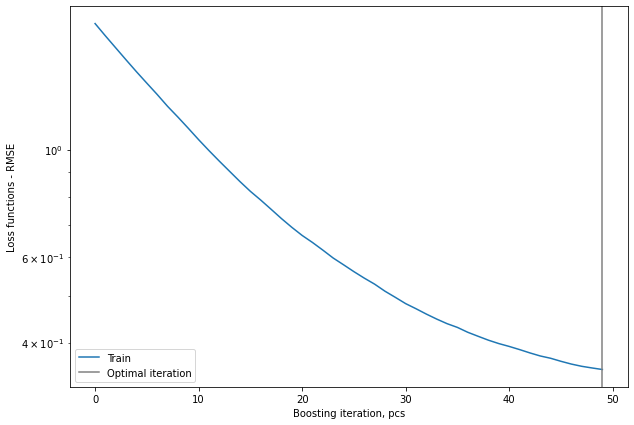

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.1
Relative bias(%):  -6.17
RMSE: 0.4
Relative RMSE(%):  0.170
MSE: 0.1
R square: 90.1%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 0.368
a1: 0.792
R^2: 0.922
Uncertainty
a0: 0.37+/-0.04
a1: 0.792+/-0.016


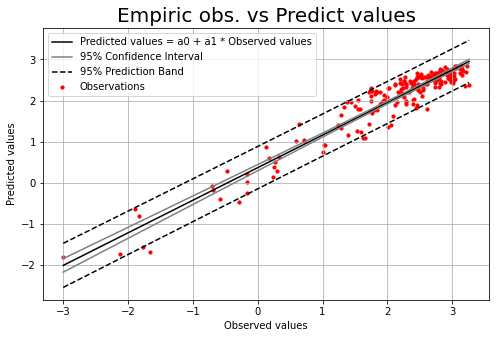

In [33]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-3, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

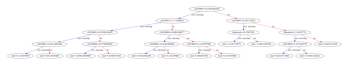

In [34]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

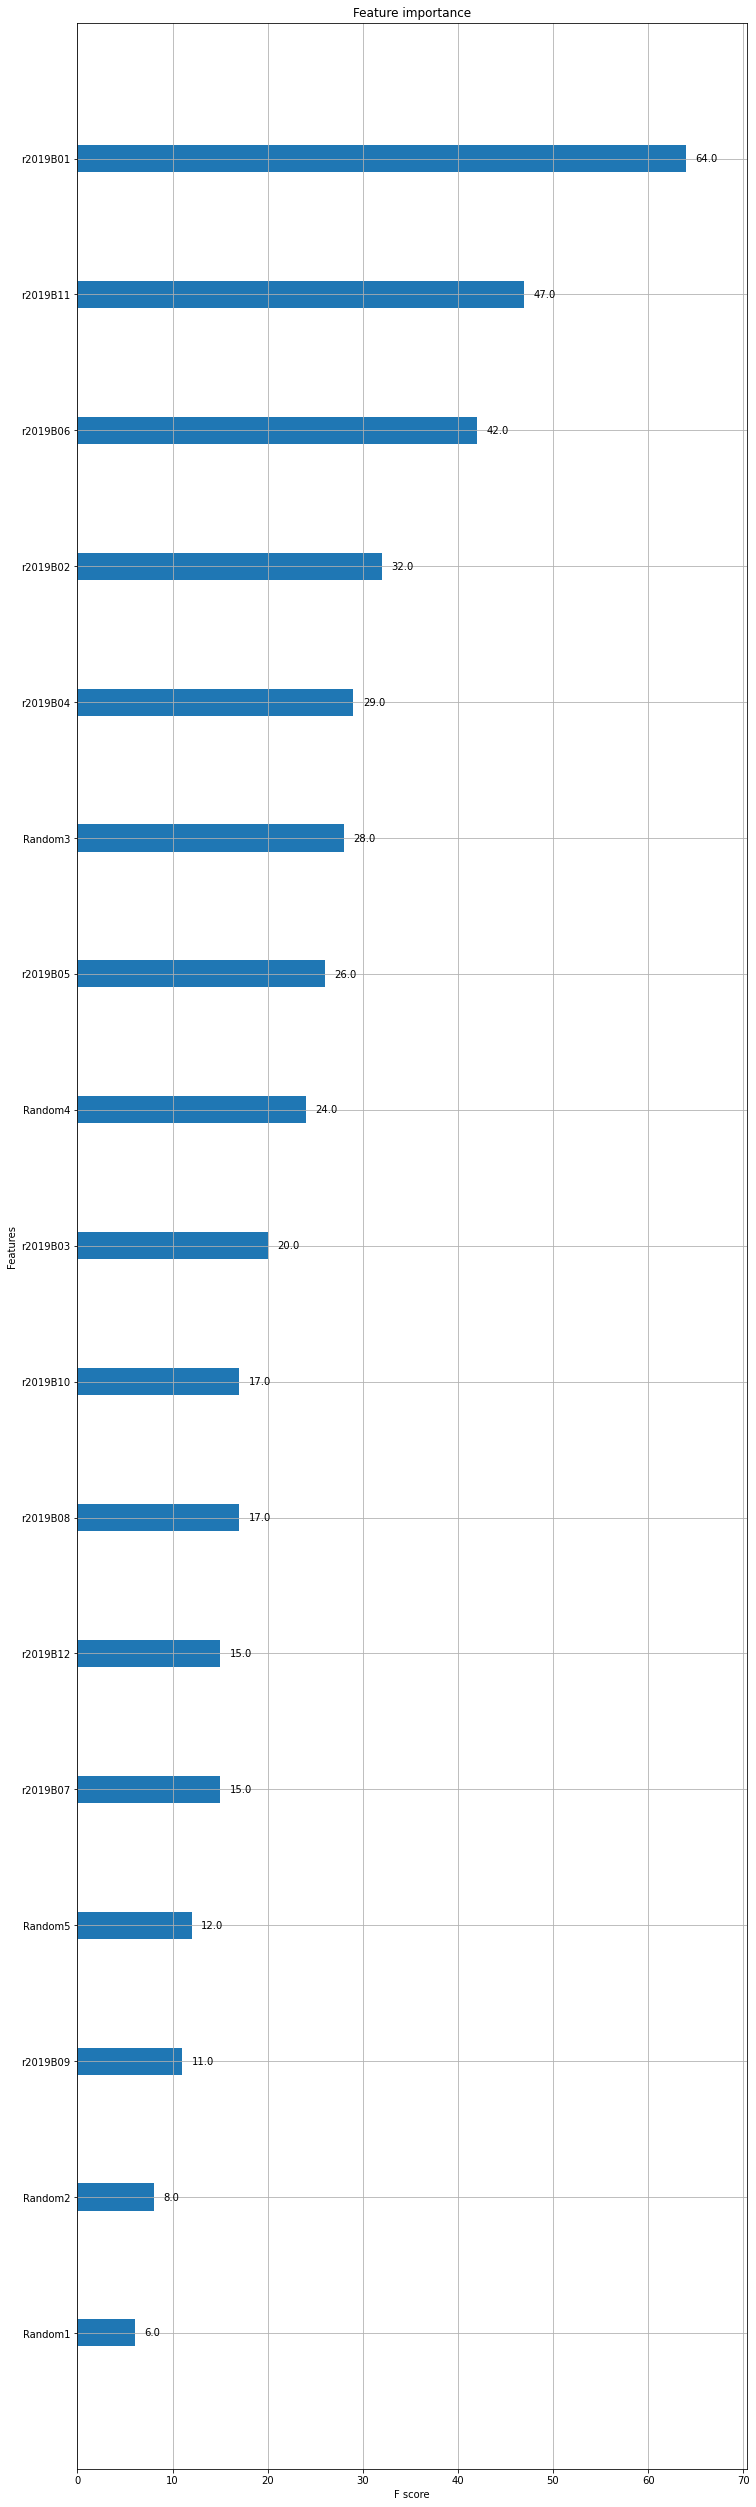

In [35]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

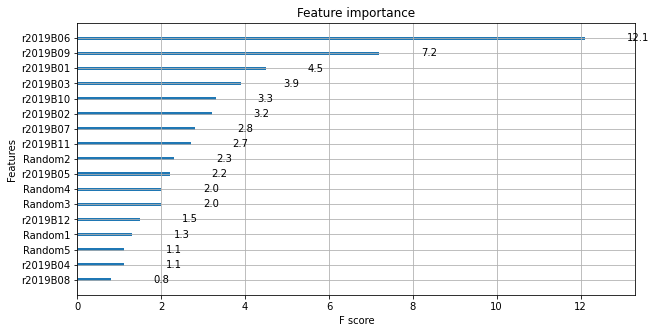

In [36]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

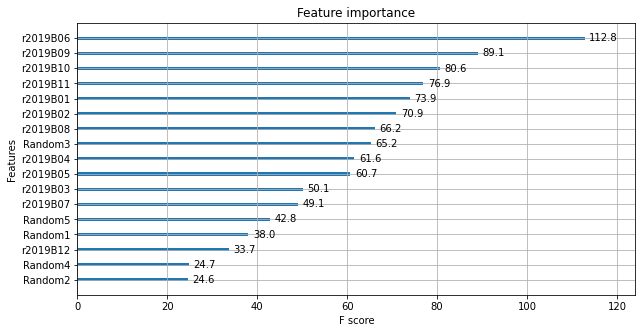

In [37]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [38]:
# Load SHAP`s library
import shap

In [39]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


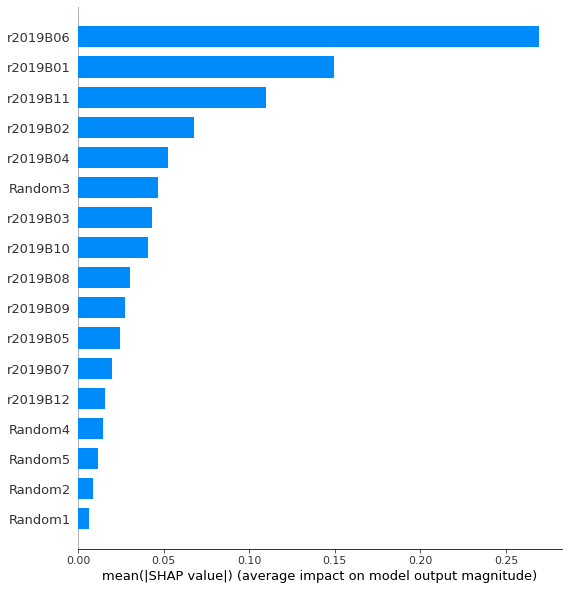

In [40]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

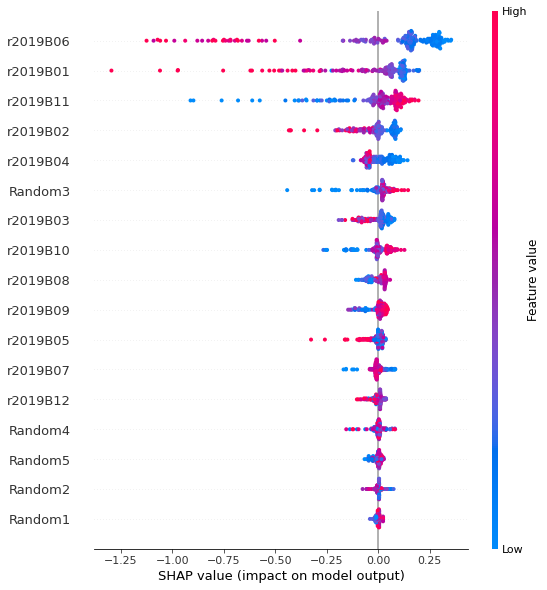

In [41]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

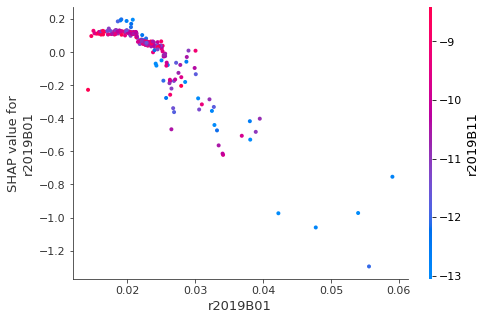

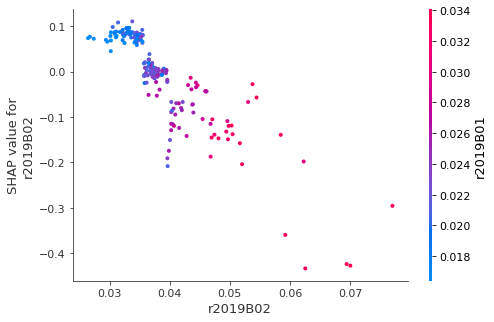

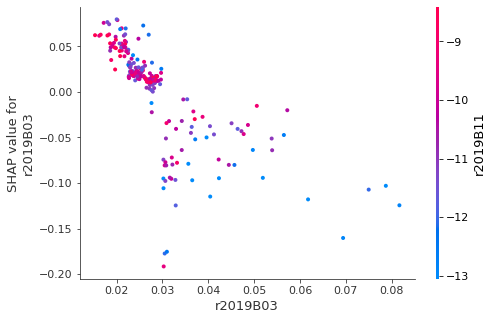

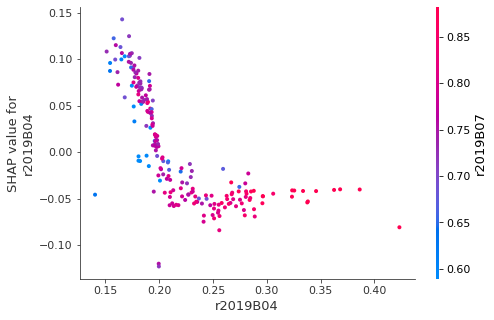

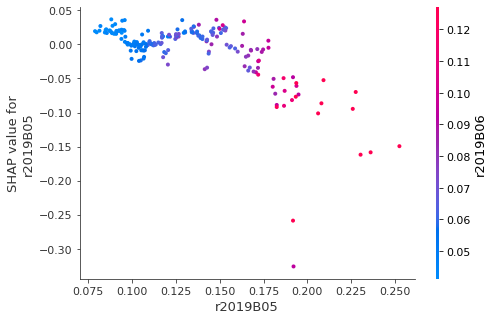

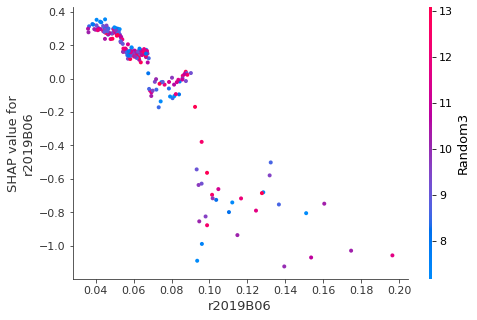

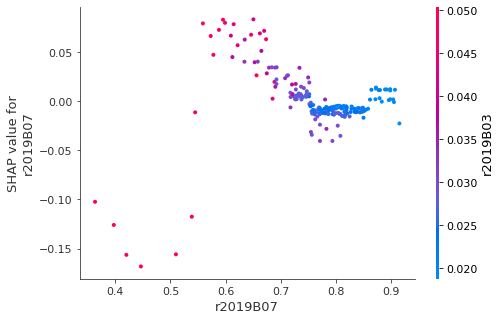

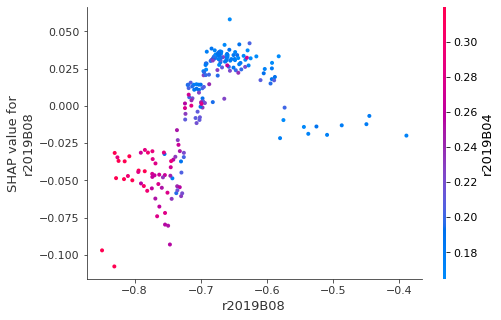

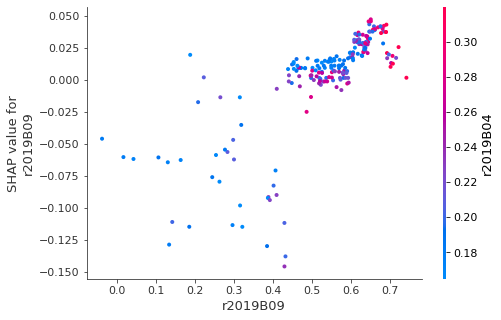

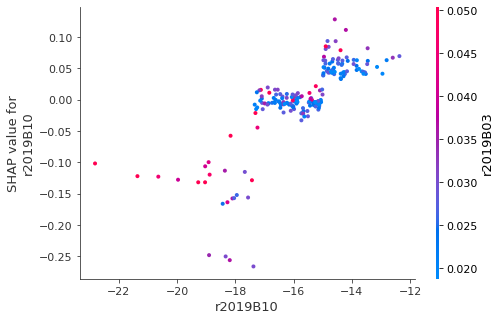

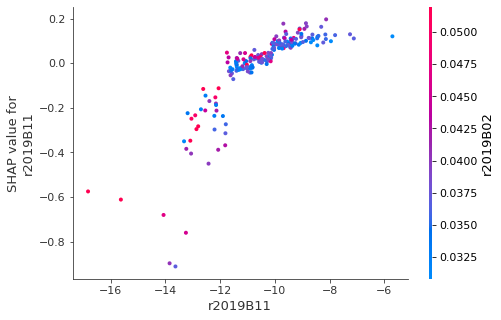

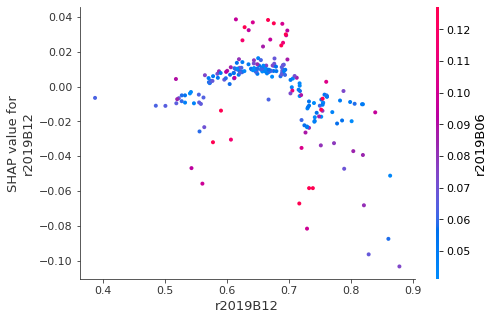

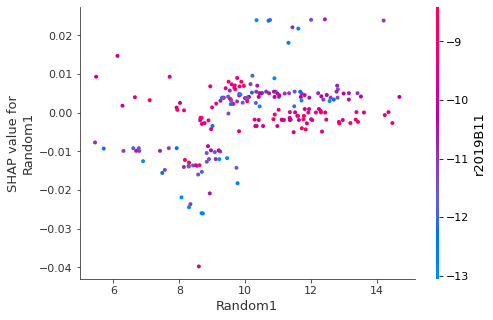

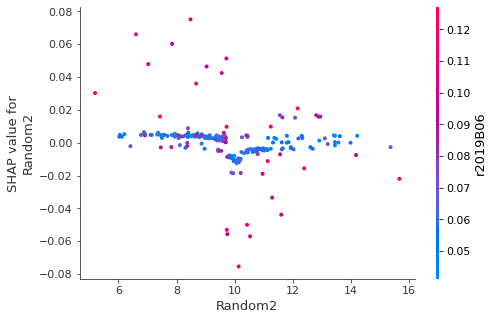

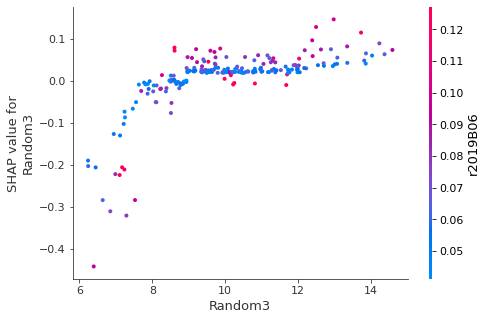

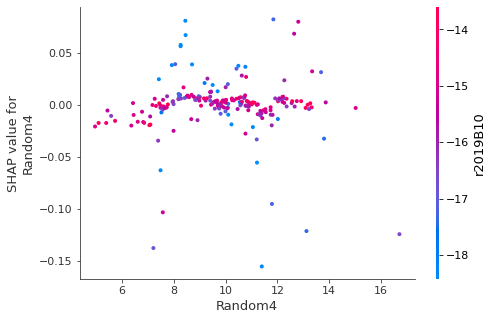

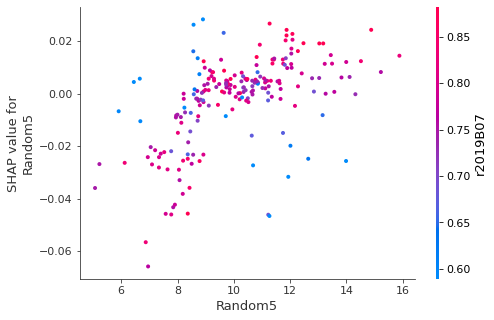

In [42]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [ ]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/.txt")